In [1]:
import numpy as np
import pandas as pd
import embedding_helper

/Users/aceto/anaconda3/lib/python3.11/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
[nltk_data] Downloading package punkt to /Users/aceto/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [174]:
VAL_DATA = "../data/validation/validation_data_top_10_percent_0.8.csv"
GAMES_DATA = "../data/clean_data.csv"

In [175]:
val_data = pd.read_csv(VAL_DATA, sep=";", index_col=0)
#lower index
val_data.index = val_data.index.str.lower()
#lower columns
val_data.columns = val_data.columns.str.lower()
val_data

,a total war saga: troy,among us,baldur's gate,baldur's gate ii,baldur's gate 3,batman: arkham city,batman: arkham knight,batman: arkham origins,block n load,block story,...,total war: napoleon definitive edition,total war: pharaoh,total war: rome remastered,total war: rome ii - emperor edition,total war: three kingdoms,total war: warhammer,total war: warhammer ii,total war: warhammer iii,uncharted: legacy of thieves collection,unturned
a total war saga: troy,0.85,0.00,0.50,0.50,0.50,0.0,0.0,0.0,0.0,0.0,...,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.00,0.00
among us,0.00,0.85,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
baldur's gate,0.50,0.00,0.85,0.85,0.85,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
baldur's gate ii,0.50,0.00,0.85,0.85,0.85,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
baldur's gate 3,0.50,0.00,0.85,0.85,0.85,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
total war: warhammer,0.85,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.00,0.00
total war: warhammer ii,0.85,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.00,0.00
total war: warhammer iii,0.85,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.85,0.00,0.00
uncharted: legacy of thieves collection,0.00,0.00,0.00,0.00,0.00,0.5,0.5,0.5,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.85,0.00


In [109]:
games_clean = pd.read_csv(GAMES_DATA, sep=";",)
#lower all Name
games_clean['Name'] = games_clean['Name'].str.lower()
#games_clean = games_clean.set_index('Name')
games_clean

,Name,Release date,Estimated owners,About the game,Positive,Negative,Developers,Publishers,Categories,Genres,Tags,Popularity
0,counter-strike: global offensive,21.08.2012,100000000,Counter-Strike: Global Offensive (CS: GO) expa...,5764420,766677,"Valve,Hidden Path Entertainment",Valve,"Multi-player,Steam Achievements,Full controlle...","Action,Free to Play","FPS,Shooter,Multiplayer,Competitive,Action,Tea...",0.785569
1,dota 2,09.07.2013,200000000,"The most-played game on Steam. Every day, mill...",1477153,300437,Valve,Valve,"Multi-player,Co-op,Steam Trading Cards,Steam W...","Action,Free to Play,Strategy","Free to Play,MOBA,Multiplayer,Strategy,e-sport...",0.566434
2,pubg: battlegrounds,21.12.2017,100000000,"LAND, LOOT, SURVIVE! Play PUBG: BATTLEGROUNDS ...",1154655,895978,"KRAFTON, Inc.","KRAFTON, Inc.","Multi-player,PvP,Online PvP,Stats,Remote Play ...","Action,Adventure,Free to Play,Massively Multip...","Survival,Shooter,Multiplayer,Battle Royale,FPS...",0.434255
3,team fortress 2,10.10.2007,100000000,The most fun you can have online - PC Gamer Is...,823693,56683,Valve,Valve,"Multi-player,Cross-Platform Multiplayer,Steam ...","Action,Free to Play","Free to Play,Hero Shooter,Multiplayer,FPS,Shoo...",0.275344
4,black myth: wukong,19.08.2024,100000000,Black Myth: Wukong is an action RPG rooted in ...,663109,28700,Game Science,Game Science,"Single-player,Steam Achievements,Full controll...","Action,Adventure,RPG","Mythology,Action RPG,Action,RPG,Souls-like,Com...",0.257988
...,...,...,...,...,...,...,...,...,...,...,...,...
9574,deserving life,13.10.2017,100000,Deserving Life is a room-scale virtual reality...,96,20,"Lukas Paul, Gabriel Mittermair",Deserving Life,"Single-player,Steam Achievements",Free to Play,"Free to Play,Horror,VR",0.000211
9575,timen runner,26.05.2017,100000,Hardcore pixel 2D platformer with steampunk el...,49,44,REX PEX GAMES,REX PEX GAMES,"Single-player,Steam Achievements,Steam Trading...","Casual,Indie","Indie,Casual,Platformer,2D,Pixel Graphics,Grea...",0.000211
9576,mahjong deluxe 2: astral planes,20.07.2016,100000,Mahjong Deluxe 2: Astral Planes is an out-of-t...,47,45,EnsenaSoft,EnsenaSoft,Unknown,Casual,"Casual,Puzzle",0.000211
9577,pizza frenzy deluxe,30.08.2006,100000,Pizza Frenzy is a wacky action puzzler that pu...,125,5,"PopCap Games, Inc.","PopCap Games, Inc.",Single-player,Casual,Casual,0.000211


In [110]:
#games_clean['Name' == "Baldur's Gate II"]

## Only keep the games that are in the validation data

In [111]:
## Only keep the games that are in the validation data
games_clean = games_clean[games_clean['Name'].isin(val_data.index)]
games_clean

,Name,Release date,Estimated owners,About the game,Positive,Negative,Developers,Publishers,Categories,Genres,Tags,Popularity
7,terraria,16.05.2011,50000000,"Dig, Fight, Explore, Build: The very world is ...",964983,21044,Re-Logic,Re-Logic,"Single-player,Multi-player,PvP,Online PvP,Co-o...","Action,Adventure,Indie,RPG","Open World Survival Craft,Sandbox,Survival,2D,...",0.181122
10,among us,16.11.2018,50000000,Play with 4-15 player online or via local WiFi...,577656,51069,Innersloth,Innersloth,"Multi-player,PvP,Online PvP,LAN PvP,Co-op,Onli...",Casual,"Multiplayer,Online Co-Op,Social Deduction,Spac...",0.154622
17,unturned,07.07.2017,50000000,STAY UNTURNED You're one of the few not yet tu...,443320,41385,Smartly Dressed Games,Smartly Dressed Games,"Single-player,Multi-player,PvP,Online PvP,LAN ...","Action,Adventure,Casual,Free to Play,Indie","Free to Play,Survival,Zombies,Open World Survi...",0.142265
26,the witcher 3: wild hunt,18.05.2015,20000000,The Witcher: Wild Hunt is a story-driven open ...,617738,25020,CD PROJEKT RED,CD PROJEKT RED,"Single-player,Steam Achievements,Full controll...",RPG,"Open World,RPG,Story Rich,Atmospheric,Mature,F...",0.093750
29,rocket league,06.07.2015,20000000,Rocket League is a high-powered hybrid of arca...,493188,62447,Psyonix LLC,Psyonix LLC,"Single-player,Multi-player,PvP,Online PvP,Shar...","Action,Indie,Racing,Sports","Multiplayer,Soccer,Competitive,Sports,Racing,T...",0.089604
32,stardew valley,26.02.2016,20000000,Stardew Valley is an open-ended country-life R...,475785,8983,ConcernedApe,ConcernedApe,"Single-player,Multi-player,Co-op,Online Co-op,...","Indie,RPG,Simulation","Farming Sim,Life Sim,Pixel Graphics,RPG,Multip...",0.079778
59,fallout 4,09.11.2015,10000000,"Bethesda Game Studios, the award-winning creat...",229418,53135,Bethesda Game Studios,Bethesda Softworks,"Single-player,Steam Achievements,Full controll...",RPG,"Open World,Post-apocalyptic,Exploration,Single...",0.046869
65,sid meiers civilization vi,20.10.2016,10000000,Civilization VI offers new ways to engage with...,186295,36439,"Firaxis Games,Aspyr (Mac),Aspyr (Linux)","2K,Aspyr (Mac),Aspyr (Linux)","Single-player,Multi-player,PvP,Online PvP,LAN ...",Strategy,"Strategy,Turn-Based Strategy,Historical,Multip...",0.040762
73,tomb raider,04.03.2013,10000000,Tomb Raider explores the intense and gritty or...,206420,8185,"Crystal Dynamics,Eidos-Montréal,Feral Interact...","Square Enix,Feral Interactive (Mac)","Single-player,Multi-player,Steam Achievements,...","Action,Adventure","Adventure,Action,Female Protagonist,Third Pers...",0.037933
75,cities: skylines,10.03.2015,10000000,Cities: Skylines is a modern take on the class...,187151,13180,Colossal Order Ltd.,Paradox Interactive,"Single-player,Steam Achievements,Steam Trading...","Simulation,Strategy","City Builder,Simulation,Building,Management,St...",0.037166


In [112]:
from transformers import BertTokenizer, BertModel
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

games_clean['sentences_desc'] = games_clean['About the game'].apply(lambda x: embedding_helper.string_to_sentences(x))
games_clean['bert_tokens_desc'] = games_clean['About the game'].apply(lambda x: bert_tokenizer(x, return_tensors='pt', is_split_into_words=True, padding=True, truncation=True))
games_clean['desc_tag'] =games_clean['Tags'] + '.' + games_clean['About the game']
games_clean['sentences_desc_tag'] = games_clean['desc_tag'].apply(lambda x: embedding_helper.string_to_sentences(x))
games_clean['tags_token'] = games_clean['Tags'].apply(lambda x: x.split(','))
games_clean['genre_token'] = games_clean['Genres'].apply(lambda x: x.split(','))

/Users/aceto/anaconda3/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
/var/folders/3r/gx5x0f7n6lvd5yzgw2zddpv80000gn/T/ipykernel_37781/452768423.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_clean['sentences_desc'] = games_clean['About the game'].apply(lambda x: embedding_helper.string_to_sentences(x))
/var/folders/3r/gx5x0f7n6lvd5yzgw2zddpv80000gn/T/ipykernel_37781/452768423.py:5: SettingWithCopyWarning: 
A 

In [113]:
from sentence_transformers import SentenceTransformer
import gensim.downloader as api
import torch

model = SentenceTransformer('all-mpnet-base-v2')
w2v_model = api.load('word2vec-google-news-300')
bert_model = BertModel.from_pretrained('bert-base-uncased')

def get_bert_embeddings(tokens):
    "Return numpy array of embeddings for the given tokens"
    with torch.no_grad():
        output = bert_model(**tokens)
    return output.last_hidden_state.mean(dim=1)
    

games_clean['embeddings_desc'] = games_clean['sentences_desc'].apply(lambda x: model.encode(x).mean(axis=0))
games_clean['embeddings_desc_wrong'] = games_clean['About the game'].apply(lambda x: model.encode(x))
games_clean['embeddings_desc_tokens'] = games_clean['bert_tokens_desc'].apply(lambda x: get_bert_embeddings(x))
games_clean['embeddings_desc_tag'] = games_clean['sentences_desc_tag'].apply(lambda x: model.encode(x).mean(axis=0))
games_clean['tags_embd'] = games_clean['tags_token'].apply(lambda x: np.mean([w2v_model[word] for word in x if word in w2v_model], axis=0))
games_clean['genre_embd'] = games_clean['genre_token'].apply(lambda x: np.mean([w2v_model[word] for word in x if word in w2v_model], axis=0))

/Users/aceto/anaconda3/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
/var/folders/3r/gx5x0f7n6lvd5yzgw2zddpv80000gn/T/ipykernel_37781/3169767452.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_clean['embeddings_desc'] = games_clean['sentences_desc'].apply(lambda x: model.encode(x).mean(axis=0))
/var/folders/3r/gx5x0f7n6lvd5yzgw2zddpv80000gn/T/ipykernel_37781/3169767452.py:17: SettingWithCopyWarning: 
A value 

In [114]:
games_clean['embeddings_desc'] = games_clean['embeddings_desc'].apply(lambda x: np.zeros(768) if isinstance(x, float) and pd.isna(x) else x)
games_clean['embeddings_desc_wrong'] = games_clean['embeddings_desc_wrong'].apply(lambda x: np.zeros(768) if isinstance(x, float) and pd.isna(x) else x)
games_clean['embeddings_desc_tokens'] = games_clean['embeddings_desc_tokens'].apply(lambda x: np.zeros(768) if isinstance(x, float) and pd.isna(x) else x)
games_clean['embeddings_desc_tag'] = games_clean['embeddings_desc_tag'].apply(lambda x: np.zeros(768) if isinstance(x, float) and pd.isna(x) else x)
games_clean['tags_embd'] = games_clean['tags_embd'].apply(lambda x: np.zeros(300) if isinstance(x, float) and pd.isna(x) else x)
games_clean['genre_embd'] = games_clean['genre_embd'].apply(lambda x: np.zeros(300) if isinstance(x, float) and pd.isna(x) else x)

/var/folders/3r/gx5x0f7n6lvd5yzgw2zddpv80000gn/T/ipykernel_37781/2527540502.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_clean['embeddings_desc'] = games_clean['embeddings_desc'].apply(lambda x: np.zeros(768) if isinstance(x, float) and pd.isna(x) else x)
/var/folders/3r/gx5x0f7n6lvd5yzgw2zddpv80000gn/T/ipykernel_37781/2527540502.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_clean['embeddings_desc_wrong'] = games_clean['embeddings_desc_wrong'].apply(lambda x: np.zeros(768) if isinst

## Calculate a similarity matrix between all test entries

from tqdm import tqdm
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = pd.DataFrame(index=games_clean.index, columns=games_clean.index, dtype=np.float32)
for i in tqdm(games_clean.index):
    for j in games_clean.index:
        similarity_matrix.loc[i, j] = cosine_similarity(
            games_clean['embeddings_desc'].loc[i].reshape(1, -1),
            games_clean['embeddings_desc'].loc[j].reshape(1, -1)
        )[0, 0]

In [172]:
from tqdm import tqdm
from sklearn.metrics.pairwise import cosine_similarity

def calc_sim_matrix(games_clean: pd.DataFrame, embd_column: str):
    similarity_matrix = pd.DataFrame(index=games_clean['Name'], columns=games_clean['Name'], dtype=np.float32)
    tracker = []
    # Calculate the similarity matrix
    for i in tqdm(games_clean.index):
        if i in tracker:
            continue
        for j in games_clean.index:
            embedding_i = games_clean.loc[i, embd_column]
            embedding_j = games_clean.loc[j, embd_column]
            similarity_matrix.loc[games_clean.loc[i, 'Name'], games_clean.loc[j, 'Name']] = cosine_similarity(
                embedding_i.reshape(1, -1),
                embedding_j.reshape(1, -1)
            )[0, 0]
        tracker.append(i)
    return similarity_matrix
# Verify embeddings are correctly calculated
assert not games_clean['embeddings_desc'].isnull().any(), "Some embeddings are null"

# Initialize the similarity matrix
similarity_matrix_desc = calc_sim_matrix(games_clean, 'embeddings_desc')
#Drop duplicate colum names and index names
similarity_matrix_desc

100%|██████████| 59/59 [00:00<00:00, 90.58it/s]


Name,terraria,among us,unturned,the witcher 3: wild hunt,rocket league,stardew valley,fallout 4,sid meiers civilization vi,tomb raider,cities: skylines,...,tomb raider vi: the angel of darkness,tomb raider iii,cubic castles,uncharted: legacy of thieves collection,total war: pharaoh,a total war saga: troy,block story,batman: arkham city,stranded,farm for your life
Name,,,,,,,,,,,,,,,,,,,,,
terraria,1.000000,0.418409,0.544538,0.653379,0.197249,0.566272,0.681062,0.583899,0.551367,0.404240,...,0.264326,0.509785,0.675898,0.501096,0.589751,0.425447,0.698929,0.205307,0.432545,0.531149
among us,0.418409,1.000000,0.699612,0.455712,0.338565,0.436270,0.577216,0.432041,0.426721,0.330514,...,0.237124,0.308412,0.491510,0.460075,0.391767,0.281282,0.480309,0.218853,0.390164,0.476928
unturned,0.544538,0.699612,1.000000,0.582985,0.202271,0.680370,0.674255,0.587247,0.462948,0.471479,...,0.230147,0.281994,0.599844,0.395705,0.504644,0.346975,0.663550,0.223797,0.329101,0.631460
the witcher 3: wild hunt,0.653379,0.455712,0.582985,1.000000,0.184871,0.541590,0.650740,0.529123,0.580148,0.366262,...,0.468413,0.519431,0.518789,0.595914,0.622343,0.532920,0.757605,0.289476,0.353006,0.599837
rocket league,0.197249,0.338565,0.202271,0.184871,1.000000,0.144809,0.268660,0.194953,0.202332,0.245379,...,0.042980,0.164824,0.284734,0.350589,0.205352,0.086427,0.250939,0.138376,0.137641,0.137065
stardew valley,0.566272,0.436270,0.680370,0.541590,0.144809,1.000000,0.590218,0.546625,0.435504,0.426490,...,0.234086,0.304671,0.687931,0.376777,0.409058,0.294862,0.646643,0.106598,0.277775,0.688703
fallout 4,0.681062,0.577216,0.674255,0.650740,0.268660,0.590218,1.000000,0.618560,0.555711,0.451760,...,0.335042,0.433182,0.663774,0.590735,0.623757,0.426594,0.672377,0.337995,0.387928,0.634272
sid meiers civilization vi,0.583899,0.432041,0.587247,0.529123,0.194953,0.546625,0.618560,1.000000,0.366098,0.600104,...,0.183907,0.259328,0.494389,0.370895,0.657710,0.451931,0.580478,0.131220,0.187596,0.486593
tomb raider,0.551367,0.426721,0.462948,0.580148,0.202332,0.435504,0.555711,0.366098,1.000000,0.251802,...,0.637548,0.712413,0.456383,0.628960,0.505063,0.519537,0.601102,0.288777,0.463984,0.520991


### Create function to see the delta between the calculated similarity and the validation data

In [176]:
def delta_matrix(val_data, similarity_matrix):
    delta = pd.DataFrame(index=similarity_matrix.index, columns=similarity_matrix.columns, dtype=np.float32)
    tracker = []
    for i in similarity_matrix.index:
        if i in tracker:
            continue
        for j in similarity_matrix.columns:
            val_sim = val_data.loc[i, j]
            calc_sim = similarity_matrix.loc[i, j]
            delta.loc[i, j] = val_sim - calc_sim
        tracker.append(i)
    return delta

delta_matrix(val_data, similarity_matrix_desc)

/var/folders/3r/gx5x0f7n6lvd5yzgw2zddpv80000gn/T/ipykernel_37781/1831959040.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-0.15000011920928957' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  delta.loc[i, j] = val_sim - calc_sim
/var/folders/3r/gx5x0f7n6lvd5yzgw2zddpv80000gn/T/ipykernel_37781/1831959040.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.257478928565979' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  delta.loc[i, j] = val_sim - calc_sim
/var/folders/3r/gx5x0f7n6lvd5yzgw2zddpv80000gn/T/ipykernel_37781/1831959040.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.1542187690734863' has dtype incompatible with float32, please exp

Name,terraria,among us,unturned,the witcher 3: wild hunt,rocket league,stardew valley,fallout 4,sid meiers civilization vi,tomb raider,cities: skylines,...,tomb raider vi: the angel of darkness,tomb raider iii,cubic castles,uncharted: legacy of thieves collection,total war: pharaoh,a total war saga: troy,block story,batman: arkham city,stranded,farm for your life
Name,,,,,,,,,,,,,,,,,,,,,
terraria,-0.150000,-0.418409,-0.044538,-0.653379,-0.197249,-0.066272,-0.681062,-0.583899,-0.551367,-0.404240,...,-0.264326,-0.509785,0.174102,-0.501096,-0.589751,-0.425447,0.151071,-0.205307,-0.432545,-0.031149
among us,-0.418409,-0.150000,-0.699612,-0.455712,-0.338565,-0.436270,-0.577216,-0.432041,-0.426721,-0.330514,...,-0.237124,-0.308412,-0.491510,-0.460075,-0.391767,-0.281282,-0.480309,-0.218853,-0.390164,-0.476928
unturned,-0.044538,-0.699612,-0.150000,-0.582985,-0.202271,-0.680370,-0.674255,-0.587247,-0.462948,-0.471479,...,-0.230147,-0.281994,-0.099844,-0.395705,-0.504644,-0.346975,-0.163550,-0.223797,-0.329101,-0.631460
the witcher 3: wild hunt,-0.653379,-0.455712,-0.582985,-0.150000,-0.184871,-0.541590,-0.150740,-0.529123,-0.080148,-0.366262,...,-0.468413,-0.519431,-0.518789,-0.095914,-0.622343,-0.532920,-0.757605,0.210524,-0.353006,-0.599837
rocket league,-0.197249,-0.338565,-0.202271,-0.184871,-0.150000,-0.144809,-0.268660,-0.194953,-0.202332,-0.245379,...,-0.042980,-0.164824,-0.284734,-0.350589,-0.205352,-0.086427,-0.250939,-0.138376,-0.137641,-0.137065
stardew valley,-0.066272,-0.436270,-0.680370,-0.541590,-0.144809,-0.150000,-0.590218,-0.546625,-0.435504,-0.426490,...,-0.234086,-0.304671,-0.687931,-0.376777,-0.409058,-0.294862,-0.646643,-0.106598,-0.277775,0.161297
fallout 4,-0.681062,-0.577216,-0.674255,-0.150740,-0.268660,-0.590218,-0.150000,-0.618560,0.294289,-0.451760,...,0.514958,0.416818,-0.663774,0.259265,-0.623757,-0.426594,-0.672377,0.162005,0.462072,-0.634272
sid meiers civilization vi,-0.583899,-0.432041,-0.587247,-0.529123,-0.194953,-0.546625,-0.618560,-0.150000,-0.366098,-0.100104,...,-0.183907,-0.259328,-0.494389,-0.370895,0.192290,0.048069,-0.580478,-0.131220,-0.187596,-0.486593
tomb raider,-0.551367,-0.426721,-0.462948,-0.080148,-0.202332,-0.435504,0.294289,-0.366098,-0.150000,-0.251802,...,0.212452,0.137587,-0.456383,0.221040,-0.505063,-0.519537,-0.601102,0.211223,0.386016,-0.520991


In [178]:
def find_highest_deltas(delta_matrix, similarity_matrix,  n:int):
    deltas = delta_matrix.unstack().sort_values(ascending=False)
    deltas = pd.DataFrame(deltas, columns=['delta'])
    deltas['val_sim'] = [val_data.loc[i, j] for i, j in deltas.index]
    deltas['calc_sim'] = [similarity_matrix.loc[i, j] for i, j in deltas.index]
    return deltas.head(n)
find_highest_deltas(delta_matrix(val_data, similarity_matrix_desc), similarity_matrix_desc, 120)

/var/folders/3r/gx5x0f7n6lvd5yzgw2zddpv80000gn/T/ipykernel_37781/1831959040.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-0.15000011920928957' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  delta.loc[i, j] = val_sim - calc_sim
/var/folders/3r/gx5x0f7n6lvd5yzgw2zddpv80000gn/T/ipykernel_37781/1831959040.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.257478928565979' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  delta.loc[i, j] = val_sim - calc_sim
/var/folders/3r/gx5x0f7n6lvd5yzgw2zddpv80000gn/T/ipykernel_37781/1831959040.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.1542187690734863' has dtype incompatible with float32, please exp

,,delta,val_sim,calc_sim
Name,Name,,,
stranded,tomb raider ii,0.677294,0.85,0.172706
tomb raider ii,stranded,0.677294,0.85,0.172706
just cause 3,tomb raider ii,0.665217,0.85,0.184783
tomb raider ii,just cause 3,0.665217,0.85,0.184783
fallout 3,tomb raider ii,0.632450,0.85,0.217550
...,...,...,...,...
just cause 3,uncharted: legacy of thieves collection,0.365093,0.85,0.484907
fallout 4,tomb raider i,0.356909,0.85,0.493091
tomb raider i,fallout 4,0.356909,0.85,0.493091


## Compare the calculated similarity matrix with the validation data

## Assign the predicted similarities (3 types) to the amount of similarity to later create boxplots

In [157]:
def evaluate_similarity(val_data, similarity_matrix):
    sim_eval = {
        0: [],
        0.5: [],
        1: []
    }
    evaluated_pairs = set()
    for i in similarity_matrix.index:
        for j in similarity_matrix.columns:
            if i == j:
                continue
            pair = tuple(sorted([i, j]))
            if pair in evaluated_pairs:
                continue
            evaluated_pairs.add(pair)
            val_sim = val_data.loc[i, j]
            calc_sim = similarity_matrix.loc[i, j]
            if val_sim == 0:
                sim_eval[0].append(calc_sim)
            elif val_sim == 0.5:
                sim_eval[0.5].append(calc_sim)
            elif val_sim == 1:
                sim_eval[1].append(calc_sim)
    return sim_eval
sim_eval_desc = evaluate_similarity(val_data, similarity_matrix_desc)

/var/folders/3r/gx5x0f7n6lvd5yzgw2zddpv80000gn/T/ipykernel_37781/524663010.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(sim_eval.values(), labels=sim_eval.keys())


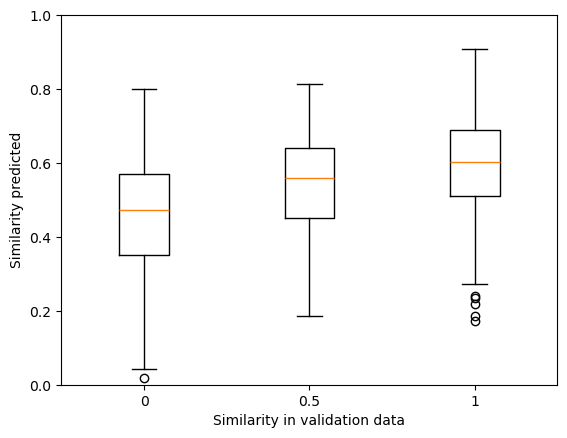

In [158]:
import matplotlib.pyplot as plt
def plot_sim_eval(sim_eval:dict):
    plt.boxplot(sim_eval.values(), labels=sim_eval.keys())
    plt.ylim(0, 1)
    plt.ylabel("Similarity predicted")
    plt.xlabel("Similarity in validation data")
    plt.show()
    
plot_sim_eval(sim_eval_desc)

## Do the same for description and tags combined

In [124]:
similarity_matrix_desc_tag = calc_sim_matrix(games_clean, 'embeddings_desc_tag')
similarity_matrix_desc_tag = similarity_matrix_desc_tag.loc[:, ~similarity_matrix_desc_tag.columns.duplicated()]
similarity_matrix_desc_tag = similarity_matrix_desc_tag.loc[~similarity_matrix_desc_tag.index.duplicated(), :]
similarity_matrix_desc

100%|██████████| 59/59 [00:00<00:00, 105.07it/s]


Name,terraria,among us,unturned,the witcher 3: wild hunt,rocket league,stardew valley,fallout 4,sid meiers civilization vi,tomb raider,cities: skylines,...,tomb raider vi: the angel of darkness,tomb raider iii,cubic castles,uncharted: legacy of thieves collection,total war: pharaoh,a total war saga: troy,block story,batman: arkham city,stranded,farm for your life
Name,,,,,,,,,,,,,,,,,,,,,
terraria,1.000000,0.418409,0.544538,0.653379,0.197249,0.566272,0.681062,0.583899,0.551367,0.404240,...,0.264326,0.509785,0.675898,0.501096,0.589751,0.425447,0.698929,0.205307,0.432545,0.531149
among us,0.418409,1.000000,0.699612,0.455712,0.338565,0.436270,0.577216,0.432041,0.426721,0.330514,...,0.237124,0.308412,0.491510,0.460075,0.391767,0.281282,0.480309,0.218853,0.390164,0.476928
unturned,0.544538,0.699612,1.000000,0.582985,0.202271,0.680370,0.674255,0.587247,0.462948,0.471479,...,0.230147,0.281994,0.599844,0.395705,0.504644,0.346975,0.663550,0.223797,0.329101,0.631460
the witcher 3: wild hunt,0.653379,0.455712,0.582985,1.000000,0.184871,0.541590,0.650740,0.529123,0.580148,0.366262,...,0.468413,0.519431,0.518789,0.595914,0.622343,0.532920,0.757605,0.289476,0.353006,0.599837
rocket league,0.197249,0.338565,0.202271,0.184871,1.000000,0.144809,0.268660,0.194953,0.202332,0.245379,...,0.042980,0.164824,0.284734,0.350589,0.205352,0.086427,0.250939,0.138376,0.137641,0.137065
stardew valley,0.566272,0.436270,0.680370,0.541590,0.144809,1.000000,0.590218,0.546625,0.435504,0.426490,...,0.234086,0.304671,0.687931,0.376777,0.409058,0.294862,0.646643,0.106598,0.277775,0.688703
fallout 4,0.681062,0.577216,0.674255,0.650740,0.268660,0.590218,1.000000,0.618560,0.555711,0.451760,...,0.335042,0.433182,0.663774,0.590735,0.623757,0.426594,0.672377,0.337995,0.387928,0.634272
sid meiers civilization vi,0.583899,0.432041,0.587247,0.529123,0.194953,0.546625,0.618560,1.000000,0.366098,0.600104,...,0.183907,0.259328,0.494389,0.370895,0.657710,0.451931,0.580478,0.131220,0.187596,0.486593
tomb raider,0.551367,0.426721,0.462948,0.580148,0.202332,0.435504,0.555711,0.366098,1.000000,0.251802,...,0.637548,0.712413,0.456383,0.628960,0.505063,0.519537,0.601102,0.288777,0.463984,0.520991


/var/folders/3r/gx5x0f7n6lvd5yzgw2zddpv80000gn/T/ipykernel_37781/524663010.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(sim_eval.values(), labels=sim_eval.keys())


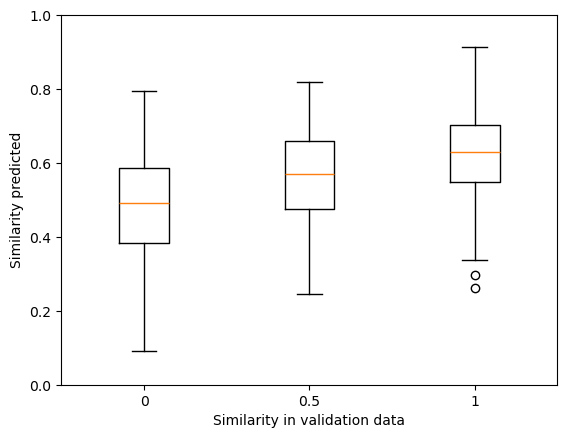

In [159]:
sim_eval_desc_tag = evaluate_similarity(val_data, similarity_matrix_desc_tag)
plot_sim_eval(sim_eval_desc_tag)

In [179]:
delta_desc_tag = delta_matrix(val_data, similarity_matrix_desc_tag)
find_highest_deltas(delta_desc_tag, similarity_matrix_desc_tag, 120)

/var/folders/3r/gx5x0f7n6lvd5yzgw2zddpv80000gn/T/ipykernel_37781/1831959040.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-0.15000000000000002' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  delta.loc[i, j] = val_sim - calc_sim
/var/folders/3r/gx5x0f7n6lvd5yzgw2zddpv80000gn/T/ipykernel_37781/1831959040.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.2436350345611572' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  delta.loc[i, j] = val_sim - calc_sim
/var/folders/3r/gx5x0f7n6lvd5yzgw2zddpv80000gn/T/ipykernel_37781/1831959040.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.13648996353149412' has dtype incompatible with float32, please e

delta  val_sim  \
Name                       Name                                            
stranded                   tomb raider ii              0.589655     0.85   
tomb raider ii             stranded                    0.589655     0.85   
                           fallout 3                   0.552444     0.85   
fallout 3                  tomb raider ii              0.552444     0.85   
tomb raider ii             just cause 3                0.512410     0.85   
...                                                         ...      ...   
far cry 3                  stranded                    0.309133     0.85   
total war: warhammer iii   total war: rome remastered  0.305196     0.85   
total war: rome remastered total war: warhammer iii    0.305196     0.85   
sid meiers civilization vi total war: rome remastered  0.303278     0.85   
total war: rome remastered sid meiers civilization vi  0.303278     0.85   

                                                       calc_sim  
Name                       Name                                  
stranded                   tomb raider ii              0.260345  
tomb raider ii             stranded                    0.260345  
                           fallout 3                   0.297556  
fallout 3                  tomb raider ii              0.297556  
tomb raider ii             just cause 3                0.337590  
...                                                         ...  
far cry 3                  stranded                    0.540867  
total war: warhammer iii   total war: rome remastered  0.544804  
total war: rome remastered total war: warhammer iii    0.544804  
sid meiers civilization vi total war: rome remastered  0.546722  
total war: rome remastered sid meiers civilization vi  0.546722  

[120 rows x 3 columns]

## Weighted approach with tags and description

In [161]:
similarity_matrix_tags = calc_sim_matrix(games_clean, 'tags_embd')
similarity_matrix_tags

100%|██████████| 59/59 [00:00<00:00, 95.35it/s]


Name,terraria,among us,unturned,the witcher 3: wild hunt,rocket league,stardew valley,fallout 4,sid meiers civilization vi,tomb raider,cities: skylines,...,tomb raider vi: the angel of darkness,tomb raider iii,cubic castles,uncharted: legacy of thieves collection,total war: pharaoh,a total war saga: troy,block story,batman: arkham city,stranded,farm for your life
Name,,,,,,,,,,,,,,,,,,,,,
terraria,1.000000,0.844967,0.930298,0.829244,0.689636,0.887188,0.933763,0.789470,0.919676,0.766464,...,0.829159,0.844541,0.936399,0.888262,0.845207,0.854407,0.919715,0.624484,0.839699,0.752106
among us,0.844967,1.000000,0.881542,0.800376,0.722528,0.833318,0.836265,0.694975,0.815985,0.752495,...,0.725421,0.729574,0.883454,0.825384,0.816058,0.829573,0.829250,0.524735,0.717890,0.771026
unturned,0.930298,0.881542,1.000000,0.835561,0.730039,0.879804,0.924575,0.743028,0.892343,0.771658,...,0.830179,0.801776,0.936571,0.878257,0.843144,0.846454,0.911229,0.600092,0.760385,0.804722
the witcher 3: wild hunt,0.829244,0.800376,0.835561,1.000000,0.643964,0.771687,0.841053,0.676689,0.834599,0.734479,...,0.803788,0.789498,0.812520,0.812878,0.768031,0.827849,0.825849,0.610686,0.754856,0.690457
rocket league,0.689636,0.722528,0.730039,0.643964,1.000000,0.723544,0.674448,0.609457,0.689341,0.690008,...,0.659856,0.660185,0.719084,0.727339,0.682558,0.697366,0.708743,0.515612,0.613765,0.678986
stardew valley,0.887188,0.833318,0.879804,0.771687,0.723544,1.000000,0.818042,0.720369,0.795604,0.794447,...,0.717522,0.715696,0.925543,0.792328,0.769391,0.790542,0.862824,0.464943,0.728792,0.815825
fallout 4,0.933763,0.836265,0.924575,0.841053,0.674448,0.818042,1.000000,0.741886,0.922135,0.746640,...,0.850444,0.868359,0.883439,0.886507,0.811942,0.831924,0.856095,0.659682,0.817739,0.743810
sid meiers civilization vi,0.789470,0.694975,0.743028,0.676689,0.609457,0.720369,0.741886,1.000000,0.762540,0.790975,...,0.715490,0.711065,0.694418,0.778165,0.872144,0.836590,0.705060,0.462167,0.698561,0.672534
tomb raider,0.919676,0.815985,0.892343,0.834599,0.689341,0.795604,0.922135,0.762540,1.000000,0.725335,...,0.896653,0.898121,0.853186,0.951490,0.839137,0.851966,0.842446,0.656849,0.816776,0.695043


In [162]:
similarity_matrix_desc_tag_weighted = similarity_matrix_desc_tag * 0.5 + similarity_matrix_tags * 0.5
similarity_matrix_desc_tag_weighted

Name,terraria,among us,unturned,the witcher 3: wild hunt,rocket league,stardew valley,fallout 4,sid meiers civilization vi,tomb raider,cities: skylines,...,tomb raider vi: the angel of darkness,tomb raider iii,cubic castles,uncharted: legacy of thieves collection,total war: pharaoh,a total war saga: troy,block story,batman: arkham city,stranded,farm for your life
Name,,,,,,,,,,,,,,,,,,,,,
terraria,1.000000,0.642609,0.738924,0.742663,0.457236,0.723871,0.808326,0.678501,0.743943,0.586582,...,0.570047,0.702651,0.818339,0.700496,0.712329,0.645980,0.811270,0.455394,0.656386,0.653232
among us,0.642609,1.000000,0.792531,0.628631,0.531515,0.635178,0.712441,0.573383,0.635426,0.541595,...,0.506210,0.558373,0.695819,0.648533,0.609209,0.587031,0.655792,0.389547,0.573790,0.632089
unturned,0.738924,0.792531,1.000000,0.711109,0.470719,0.779268,0.804126,0.671974,0.688984,0.625083,...,0.542719,0.566073,0.775976,0.644385,0.678672,0.615147,0.785008,0.425297,0.548977,0.721922
the witcher 3: wild hunt,0.742663,0.628631,0.711109,1.000000,0.414133,0.654603,0.747142,0.601091,0.709528,0.551817,...,0.645061,0.683341,0.671708,0.702415,0.695658,0.684643,0.786273,0.485744,0.566029,0.648621
rocket league,0.457236,0.531515,0.470719,0.414133,1.000000,0.436187,0.470965,0.409354,0.452884,0.467505,...,0.387301,0.444161,0.507477,0.541637,0.447536,0.420127,0.488732,0.355237,0.404269,0.419144
stardew valley,0.723871,0.635178,0.779268,0.654603,0.436187,1.000000,0.702193,0.632708,0.620009,0.609930,...,0.482504,0.536011,0.807362,0.583822,0.589386,0.546891,0.748433,0.303432,0.517220,0.749861
fallout 4,0.808326,0.712441,0.804126,0.747142,0.470965,0.702193,1.000000,0.683048,0.748795,0.601600,...,0.615973,0.686962,0.779556,0.739592,0.720706,0.649506,0.762192,0.534671,0.624772,0.698458
sid meiers civilization vi,0.678501,0.573383,0.671974,0.601091,0.409354,0.632708,0.683048,1.000000,0.573843,0.704244,...,0.459220,0.506818,0.599896,0.580016,0.766833,0.661776,0.639180,0.328609,0.458235,0.589882
tomb raider,0.743943,0.635426,0.688984,0.709528,0.452884,0.620009,0.748795,0.573843,1.000000,0.496196,...,0.794352,0.838526,0.670117,0.800689,0.676554,0.696044,0.729153,0.517236,0.661855,0.624894


/var/folders/3r/gx5x0f7n6lvd5yzgw2zddpv80000gn/T/ipykernel_37781/524663010.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(sim_eval.values(), labels=sim_eval.keys())


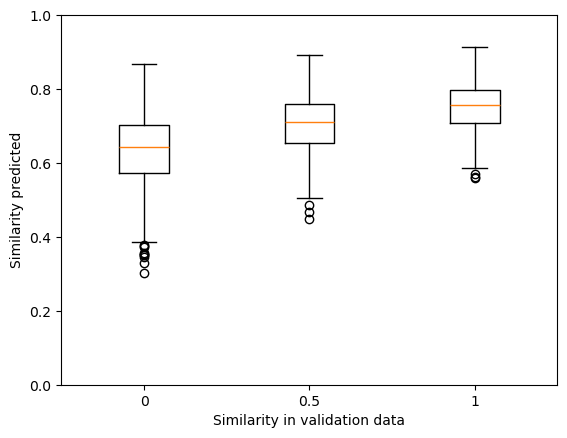

In [163]:
sim_eval_desc_tag_weighted = evaluate_similarity(val_data, similarity_matrix_desc_tag_weighted)
plot_sim_eval(sim_eval_desc_tag_weighted)

In [164]:
delta_desc_tag_weighted = delta_matrix(val_data, similarity_matrix_desc_tag_weighted)
find_highest_deltas(delta_desc_tag_weighted, similarity_matrix_desc_tag_weighted, 120)

,,delta,val_sim,calc_sim
Name,Name,,,
tomb raider ii,stranded,0.441654,1.0,0.558346
stranded,tomb raider ii,0.441654,1.0,0.558346
tomb raider vi: the angel of darkness,stranded,0.438848,1.0,0.561152
stranded,tomb raider vi: the angel of darkness,0.438848,1.0,0.561152
tomb raider vi: the angel of darkness,crashlands,0.429205,1.0,0.570795
...,...,...,...,...
dragon quest builders 2,gothic 3,0.303692,1.0,0.696308
tomb raider ii,uncharted: legacy of thieves collection,0.301952,1.0,0.698048
uncharted: legacy of thieves collection,tomb raider ii,0.301952,1.0,0.698048


## Weighted approach with genres and description

In [132]:
similarity_matrix_genres = calc_sim_matrix(games_clean, 'genre_embd')
similarity_matrix_genres

100%|██████████| 59/59 [00:00<00:00, 98.57it/s] 


Name,terraria,among us,unturned,the witcher 3: wild hunt,rocket league,stardew valley,fallout 4,sid meiers civilization vi,tomb raider,cities: skylines,...,tomb raider vi: the angel of darkness,tomb raider iii,cubic castles,uncharted: legacy of thieves collection,total war: pharaoh,a total war saga: troy,block story,batman: arkham city,stranded,farm for your life
Name,,,,,,,,,,,,,,,,,,,,,
terraria,1.000000,0.362158,0.868990,0.697221,0.654264,0.812080,0.697221,0.308458,0.768595,0.410223,...,0.580209,0.768595,0.868990,0.633695,0.546341,0.562931,1.000000,0.768595,0.839590,0.661313
among us,0.362158,1.000000,0.658899,0.252323,0.294304,0.360595,0.252323,0.122148,0.207683,0.181399,...,0.130162,0.207683,0.658899,0.195476,0.156140,0.195269,0.362158,0.207683,0.351519,0.638687
unturned,0.868990,0.658899,1.000000,0.369670,0.695789,0.648212,0.369670,0.279663,0.772138,0.379396,...,0.589458,0.772138,1.000000,0.630627,0.533672,0.543062,0.868990,0.772138,0.856104,0.767385
the witcher 3: wild hunt,0.697221,0.252323,0.369670,1.000000,0.228702,0.748591,1.000000,0.198781,0.248131,0.264444,...,0.150064,0.248131,0.369670,0.238509,0.216765,0.267819,0.697221,0.248131,0.350972,0.385759
rocket league,0.654264,0.294304,0.695789,0.228702,1.000000,0.506750,0.228702,0.245248,0.579392,0.329575,...,0.587934,0.579392,0.695789,0.340566,0.510928,0.503958,0.654264,0.579392,0.596450,0.551430
stardew valley,0.812080,0.360595,0.648212,0.748591,0.506750,1.000000,0.748591,0.291874,0.382909,0.604468,...,0.280401,0.382909,0.648212,0.323586,0.354586,0.585602,0.812080,0.382909,0.658061,0.797958
fallout 4,0.697221,0.252323,0.369670,1.000000,0.228702,0.748591,1.000000,0.198781,0.248131,0.264444,...,0.150064,0.248131,0.369670,0.238509,0.216765,0.267819,0.697221,0.248131,0.350972,0.385759
sid meiers civilization vi,0.308458,0.122148,0.279663,0.198781,0.245248,0.291874,0.198781,1.000000,0.319275,0.780380,...,0.303223,0.319275,0.279663,0.206579,0.817413,0.731072,0.308458,0.319275,0.197651,0.588701
tomb raider,0.768595,0.207683,0.772138,0.248131,0.579392,0.382909,0.248131,0.319275,1.000000,0.404979,...,0.768199,1.000000,0.772138,0.812368,0.666842,0.638681,0.768595,1.000000,0.670187,0.427001


In [165]:
similarity_matrix_desc_genres_weighted = similarity_matrix_desc * 0.7 + similarity_matrix_genres * 0.3
similarity_matrix_desc_genres_weighted

Name,terraria,among us,unturned,the witcher 3: wild hunt,rocket league,stardew valley,fallout 4,sid meiers civilization vi,tomb raider,cities: skylines,...,tomb raider vi: the angel of darkness,tomb raider iii,cubic castles,uncharted: legacy of thieves collection,total war: pharaoh,a total war saga: troy,block story,batman: arkham city,stranded,farm for your life
Name,,,,,,,,,,,,,,,,,,,,,
terraria,1.000000,0.401534,0.641874,0.666532,0.334353,0.640014,0.685909,0.501267,0.616535,0.406035,...,0.359091,0.587428,0.733826,0.540876,0.576728,0.466692,0.789250,0.374294,0.554658,0.570198
among us,0.401534,1.000000,0.687398,0.394696,0.325287,0.413568,0.479748,0.339073,0.361010,0.285779,...,0.205036,0.278194,0.541727,0.380695,0.321079,0.255478,0.444864,0.215502,0.378571,0.525456
unturned,0.641874,0.687398,1.000000,0.518990,0.350327,0.670723,0.582880,0.494972,0.555705,0.443854,...,0.337940,0.429037,0.719891,0.466182,0.513353,0.405801,0.725182,0.388299,0.487202,0.672237
the witcher 3: wild hunt,0.666532,0.394696,0.518990,1.000000,0.198020,0.603691,0.755518,0.430021,0.480543,0.335716,...,0.372908,0.438041,0.474053,0.488692,0.500670,0.453390,0.739490,0.277072,0.352396,0.535614
rocket league,0.334353,0.325287,0.350327,0.198020,1.000000,0.253391,0.256673,0.210042,0.315450,0.270638,...,0.206466,0.289195,0.408051,0.347582,0.297025,0.211687,0.371937,0.270680,0.275284,0.261374
stardew valley,0.640014,0.413568,0.670723,0.603691,0.253391,1.000000,0.637730,0.470200,0.419725,0.479883,...,0.247980,0.328142,0.676015,0.360820,0.392717,0.382084,0.696274,0.189491,0.391861,0.721480
fallout 4,0.685909,0.479748,0.582880,0.755518,0.256673,0.637730,1.000000,0.492626,0.463437,0.395565,...,0.279549,0.377667,0.575543,0.485067,0.501660,0.378961,0.679830,0.311035,0.376841,0.559718
sid meiers civilization vi,0.501267,0.339073,0.494972,0.430021,0.210042,0.470200,0.492626,1.000000,0.352051,0.654187,...,0.219702,0.277312,0.429971,0.321600,0.705621,0.535674,0.498872,0.187636,0.190613,0.517225
tomb raider,0.616535,0.361010,0.555705,0.480543,0.315450,0.419725,0.463437,0.352051,1.000000,0.297755,...,0.676743,0.798689,0.551109,0.683983,0.553597,0.555280,0.651350,0.502144,0.525845,0.492794


/var/folders/3r/gx5x0f7n6lvd5yzgw2zddpv80000gn/T/ipykernel_37781/524663010.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(sim_eval.values(), labels=sim_eval.keys())


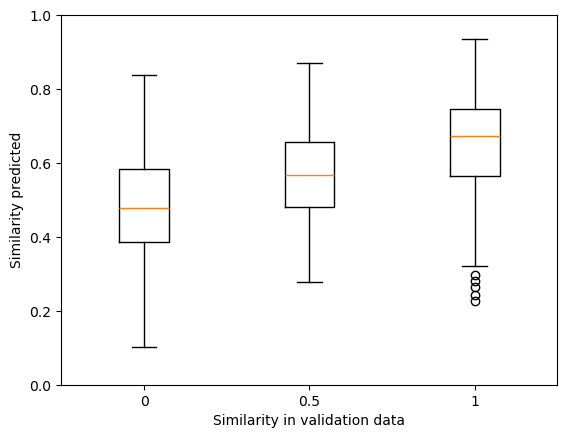

In [166]:
sim_eval_desc_genres_weighted = evaluate_similarity(val_data, similarity_matrix_desc_genres_weighted)
plot_sim_eval(sim_eval_desc_genres_weighted)

In [138]:
delta_desc_genres_weighted = delta_matrix(val_data, similarity_matrix_desc_genres_weighted)
find_highest_deltas(delta_desc_genres_weighted, similarity_matrix_desc_genres_weighted, 120)

/var/folders/3r/gx5x0f7n6lvd5yzgw2zddpv80000gn/T/ipykernel_37781/1831959040.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.5980789959430695' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  delta.loc[i, j] = val_sim - calc_sim
/var/folders/3r/gx5x0f7n6lvd5yzgw2zddpv80000gn/T/ipykernel_37781/1831959040.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.5827764570713043' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  delta.loc[i, j] = val_sim - calc_sim
/var/folders/3r/gx5x0f7n6lvd5yzgw2zddpv80000gn/T/ipykernel_37781/1831959040.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.5825367271900177' has dtype incompatible with float32, please expl

,,delta,val_sim,calc_sim
Name,Name,,,
fallout 3,tomb raider vi: the angel of darkness,0.769025,1.0,0.230975
tomb raider vi: the angel of darkness,fallout 3,0.769025,1.0,0.230975
fallout 3,tomb raider ii,0.767160,1.0,0.232840
tomb raider ii,fallout 3,0.767160,1.0,0.232840
tomb raider vi: the angel of darkness,fallout 4,0.757447,1.0,0.242553
...,...,...,...,...
tomb raider ii,tomb raider vi: the angel of darkness,0.406459,1.0,0.593541
block n load,block story,0.404644,1.0,0.595356
block story,block n load,0.404644,1.0,0.595356


## Calculate and evaluate similarities with word embeddings

In [136]:
similarity_matrix_desc_tokens = calc_sim_matrix(games_clean, 'embeddings_desc_tokens')
similarity_matrix_desc_tokens = similarity_matrix_desc_tokens.loc[:, ~similarity_matrix_desc_tokens.columns.duplicated()]
similarity_matrix_desc_tokens = similarity_matrix_desc_tokens.loc[~similarity_matrix_desc_tokens.index.duplicated(), :]
similarity_matrix_desc_tokens

100%|██████████| 59/59 [00:00<00:00, 96.54it/s] 


Name,terraria,among us,unturned,the witcher 3: wild hunt,rocket league,stardew valley,fallout 4,sid meiers civilization vi,tomb raider,cities: skylines,...,tomb raider vi: the angel of darkness,tomb raider iii,cubic castles,uncharted: legacy of thieves collection,total war: pharaoh,a total war saga: troy,block story,batman: arkham city,stranded,farm for your life
Name,,,,,,,,,,,,,,,,,,,,,
terraria,1.000000,0.860573,0.869027,0.930318,0.863874,0.930965,0.924736,0.918162,0.926545,0.893149,...,0.824644,0.867063,0.897048,0.886099,0.935590,0.853729,0.898746,0.804994,0.907339,0.890988
among us,0.860573,1.000000,0.924395,0.878740,0.915330,0.890756,0.907630,0.883825,0.868251,0.902539,...,0.751809,0.815377,0.912134,0.894516,0.843949,0.775505,0.893138,0.740232,0.863239,0.898619
unturned,0.869027,0.924395,1.000000,0.911567,0.877134,0.904847,0.919343,0.895952,0.875850,0.920893,...,0.752321,0.842078,0.927895,0.870051,0.876486,0.800055,0.911826,0.750331,0.864525,0.936483
the witcher 3: wild hunt,0.930318,0.878740,0.911567,1.000000,0.873613,0.917420,0.929964,0.902478,0.933967,0.907216,...,0.854978,0.878479,0.899239,0.901306,0.942994,0.877663,0.930004,0.807655,0.904640,0.910693
rocket league,0.863874,0.915330,0.877134,0.873613,1.000000,0.886383,0.902214,0.862183,0.856253,0.897192,...,0.715770,0.806563,0.901953,0.927039,0.847385,0.769058,0.889158,0.724638,0.849643,0.875211
stardew valley,0.930965,0.890756,0.904847,0.917420,0.886383,1.000000,0.927695,0.928634,0.912593,0.899508,...,0.786207,0.839693,0.924418,0.884603,0.900342,0.809475,0.915564,0.774158,0.877553,0.905426
fallout 4,0.924736,0.907630,0.919343,0.929964,0.902214,0.927695,1.000000,0.913974,0.916914,0.918309,...,0.779882,0.871356,0.933863,0.922566,0.909268,0.829420,0.910320,0.797155,0.902706,0.915760
sid meiers civilization vi,0.918162,0.883825,0.895952,0.902478,0.862183,0.928634,0.913974,1.000000,0.896466,0.915153,...,0.768655,0.843405,0.897984,0.859785,0.903645,0.805247,0.891140,0.751307,0.867868,0.899820
tomb raider,0.926545,0.868251,0.875850,0.933967,0.856253,0.912593,0.916914,0.896466,1.000000,0.877071,...,0.856763,0.885921,0.874481,0.889662,0.907374,0.822037,0.897187,0.807857,0.897164,0.887932


/var/folders/3r/gx5x0f7n6lvd5yzgw2zddpv80000gn/T/ipykernel_37781/524663010.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(sim_eval.values(), labels=sim_eval.keys())


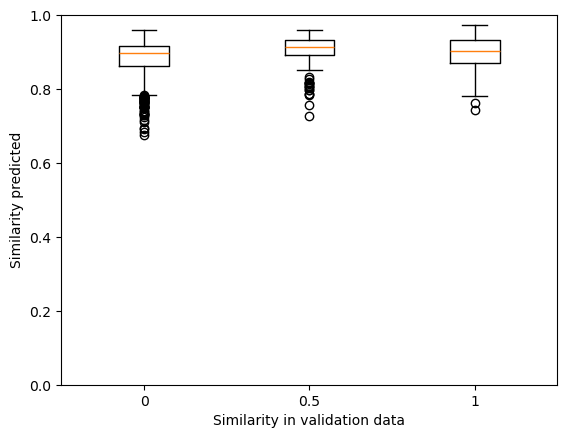

In [167]:
sim_eval_desc_tokens = evaluate_similarity(val_data, similarity_matrix_desc_tokens)
plot_sim_eval(sim_eval_desc_tokens)

In [140]:
similarity_matrix_desc_wrong = calc_sim_matrix(games_clean, 'embeddings_desc_wrong')
#Drop duplicate colum names and index names
similarity_matrix_desc_wrong = similarity_matrix_desc_wrong.loc[:, ~similarity_matrix_desc_wrong.columns.duplicated()]
similarity_matrix_desc_wrong = similarity_matrix_desc_wrong.loc[~similarity_matrix_desc_wrong.index.duplicated(), :]
similarity_matrix_desc_wrong

100%|██████████| 59/59 [00:00<00:00, 100.46it/s]


Name,terraria,among us,unturned,the witcher 3: wild hunt,rocket league,stardew valley,fallout 4,sid meiers civilization vi,tomb raider,cities: skylines,...,tomb raider vi: the angel of darkness,tomb raider iii,cubic castles,uncharted: legacy of thieves collection,total war: pharaoh,a total war saga: troy,block story,batman: arkham city,stranded,farm for your life
Name,,,,,,,,,,,,,,,,,,,,,
terraria,1.000000,0.416262,0.280089,0.462246,0.279809,0.477947,0.570389,0.437163,0.542708,0.455788,...,0.249391,0.518167,0.652023,0.413529,0.405115,0.403662,0.619199,0.249271,0.362005,0.377400
among us,0.416262,1.000000,0.285085,0.243846,0.359428,0.289129,0.399788,0.234076,0.374484,0.290127,...,0.162178,0.312890,0.387336,0.419587,0.297476,0.214252,0.318850,0.182793,0.392746,0.265041
unturned,0.280089,0.285085,1.000000,0.273610,0.142394,0.445519,0.374205,0.342104,0.332080,0.283785,...,0.178251,0.185059,0.280871,0.175855,0.265910,0.232961,0.382385,0.114569,0.202357,0.557990
the witcher 3: wild hunt,0.462246,0.243846,0.273610,1.000000,0.193834,0.327811,0.414593,0.284638,0.430214,0.223318,...,0.293908,0.346906,0.317372,0.414507,0.261067,0.303077,0.509150,0.136305,0.186811,0.288446
rocket league,0.279809,0.359428,0.142394,0.193834,1.000000,0.223662,0.332755,0.194687,0.242307,0.331874,...,0.071984,0.216816,0.274934,0.351155,0.165040,0.085640,0.218126,0.158456,0.110805,0.128237
stardew valley,0.477947,0.289129,0.445519,0.327811,0.223662,1.000000,0.420017,0.426520,0.398461,0.373789,...,0.202351,0.259476,0.477537,0.237321,0.260206,0.263527,0.521430,0.110070,0.205924,0.597761
fallout 4,0.570389,0.399788,0.374205,0.414593,0.332755,0.420017,1.000000,0.446300,0.472043,0.431349,...,0.247958,0.429515,0.447096,0.512811,0.378986,0.313439,0.459316,0.256040,0.323007,0.392825
sid meiers civilization vi,0.437163,0.234076,0.342104,0.284638,0.194687,0.426520,0.446300,1.000000,0.277763,0.423126,...,0.147172,0.196070,0.264039,0.250929,0.414151,0.444453,0.353320,0.111632,0.138109,0.252882
tomb raider,0.542708,0.374484,0.332080,0.430214,0.242307,0.398461,0.472043,0.277763,1.000000,0.277886,...,0.573865,0.742368,0.389894,0.463337,0.335760,0.377760,0.452211,0.273240,0.295910,0.331341


/var/folders/3r/gx5x0f7n6lvd5yzgw2zddpv80000gn/T/ipykernel_37781/524663010.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(sim_eval.values(), labels=sim_eval.keys())


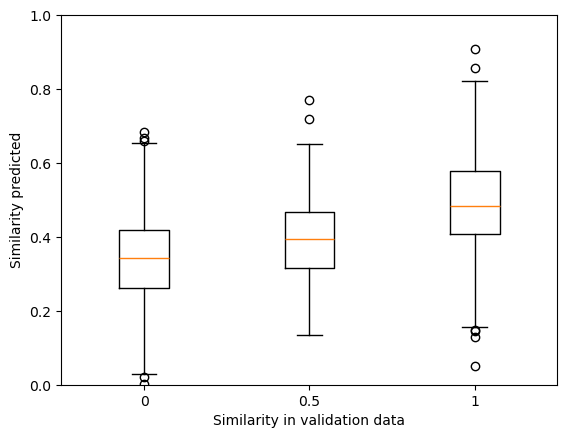

In [168]:
sim_eval_desc_wrong = evaluate_similarity(val_data, similarity_matrix_desc_wrong)
plot_sim_eval(sim_eval_desc_wrong)